# 1. Libraries of mediapipe

In [3]:
import mediapipe as mp
import cv2

In [4]:
#get the solutions of mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

- more details in the https://google.github.io/mediapipe/getting_started/python.html

# 2. mediapipe in video with Holistic

In [6]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        
        
        # there are face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Demo', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3. mediapipe in image with Holistic

In [7]:
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Recolor Feed
    image = cv2.imread('Demo.jpg')
    image.flags.writeable = False

    # Make Detections
    results = holistic.process(image)
    

    # there are face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

    # Recolor image back to BGR for rendering
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )

    # 2. Right hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

    
    cv2.namedWindow('Demo',0)#O表示显示窗口可以随意手动调节，1
    cv2.imshow('Demo',image)
    cv2.waitKey()
    cv2.destroyAllWindows()

# Model Choice of MediaPipe Holistic

- MediaPipe has three models: 
                    Face landmarks estimate model
                    Hand landmarks(right hand and left hand) estimate model 
                    Pose landmarks estimate model
- We use the subdatasets 'fyc_normal'(one person of all detection situation) to test the probability of successful identification with three models


In [1]:
import os

In [5]:
count_nor = 0
file_pathname = 'Data_compare/fyc_normal/'
for filename in os.listdir(file_pathname):
    for filename_minor in os.listdir(file_pathname+filename+'/'):
        img = cv2.imread(file_pathname+filename+'/'+filename_minor)
        count_nor += 1
print('there are '+str(count_nor)+' images')

there are 1121 images


In [6]:
#get the normal files
file_pathname = 'Data_compare/fyc_normal/'

## Face Landmarks' probability of successful identification

In [7]:
face_count = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Face landmarks
                face = results.face_landmarks.landmark

                #count the numbers
                face_count +=1
            except:
                pass

            cv2.imshow('face_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(face_count)+ ' images which can be detect')

there are 109 images which can be detect


## Left Hand Landmarks' probability of successful identification

In [10]:
Lhand_count = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Left Hand landmarks
                hand_left = results.left_hand_landmarks.landmark

                #count the numbers
                Lhand_count +=1
            except:
                pass

            cv2.imshow('Lhand_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(Lhand_count)+ ' images which can be detect')

there are 16 images which can be detect


## Right Hand Landmarks' probability of successful identification

In [11]:
Rhand_count = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Right Hand landmarks
                hand_right = results.right_hand_landmarks.landmark

                #count the numbers
                Rhand_count +=1
            except:
                pass

            cv2.imshow('Rhand_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(Rhand_count)+ ' images which can be detect')

there are 30 images which can be detect


## Pose Landmarks' probability of successful identification

In [12]:
pose_count = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark

                #count the numbers
                pose_count +=1
            except:
                pass

            cv2.imshow('pose_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(pose_count)+ ' images which can be detect')

there are 999 images which can be detect


## whole landmarks' probability of successful identification

In [13]:
whole_count = 0
# Initiate holistic model
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir(file_pathname):
        for filename_minor in os.listdir(file_pathname+filename+'/'):
            image = cv2.imread(file_pathname+filename+'/'+filename_minor)
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            #2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            try:
                # Extract whole landmarks
                face = results.face_landmarks.landmark
                hand_right = results.right_hand_landmarks.landmark
                hand_left = results.left_hand_landmarks.landmark
                pose = results.pose_landmarks.landmark
    
                #count the numbers
                whole_count +=1
            except:
                pass

            cv2.imshow('whole_images', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break


cv2.destroyAllWindows()
print('there are '+str(whole_count)+ ' images which can be detect')

there are 1 images which can be detect


### Compare the results 

In [15]:
face_acc = face_count/count_nor
Lhand_acc = Lhand_count/count_nor
Rhand_acc = Rhand_count/count_nor
pose_acc = pose_count/count_nor
whole_acc = whole_count/count_nor

In [16]:
labels = ['Face','LHand','RHand','Pose','Whole']
accuracy = [face_acc, Lhand_acc, Rhand_acc, pose_acc, whole_acc]

for acc, label in zip(accuracy, labels):
    print(f'{label} accuracy: {acc}')

Face accuracy: 0.09723461195361284
LHand accuracy: 0.014272970561998216
RHand accuracy: 0.026761819803746655
Pose accuracy: 0.8911685994647636
Whole accuracy: 0.0008920606601248885


In [20]:
import matplotlib.pyplot as plt

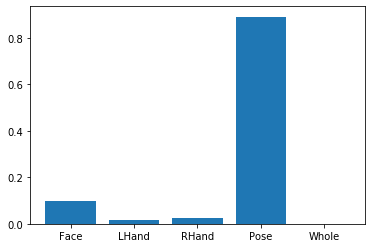

In [22]:
num_list = []
for i in accuracy:
    num_list.append(i)
name_list = labels
plt.bar(range(len(num_list)), num_list, tick_label=name_list)  
plt.show() 

- As the results, the pose landmars got the heighest accuracy. In this case, we decided to use the Pose Landmark Estimate Model.